In [1]:
%run "la_00.ipynb"

In [2]:
dfNew_total_amac_final = pd.read_csv(r'C:\Users\Elisenda\GFP_global_landscape\analysis\lis\Figures\Beneficial_mutations\Log\amac_percentage_final.csv')
dfNew_total_cgre_final = pd.read_csv(r'C:\Users\Elisenda\GFP_global_landscape\analysis\lis\Figures\Beneficial_mutations\Log\cgre_percentage_final.csv')
dfNew_total_pplu_final = pd.read_csv(r'C:\Users\Elisenda\GFP_global_landscape\analysis\lis\Figures\Beneficial_mutations\Log\pplu_percentage_final.csv')

dfNew_total_amac_thres = pd.read_csv(r'C:\Users\Elisenda\GFP_global_landscape\analysis\lis\Figures\Beneficial_mutations\Log\amac_percentage_thres.csv')
dfNew_total_cgre_thres = pd.read_csv(r'C:\Users\Elisenda\GFP_global_landscape\analysis\lis\Figures\Beneficial_mutations\Log\cgre_percentage_thres.csv')
dfNew_total_pplu_thres = pd.read_csv(r'C:\Users\Elisenda\GFP_global_landscape\analysis\lis\Figures\Beneficial_mutations\Log\pplu_percentage_thres.csv')

In [3]:
dfNew_total_pplu_final

,Unnamed: 0,position,bright_context,median,mutation,bac_num,stdev,native_mutation,ben_vs_del,comparison,ben_percentage,del_percentage
0,37259,69,-1.642609,-1.685785,G69A,8,0.254323,G58A,0.0,0.0,0.0,1.0
1,11143,124,-0.185129,-0.185218,G124S,41,0.354134,G111S,0.0,0.0,0.0,1.0
2,7628,124,-0.119782,-0.185218,G124S,41,0.354134,G111S,0.0,0.0,0.0,1.0
3,8270,124,-1.483957,-0.185218,G124S,41,0.354134,G111S,0.0,0.0,0.0,1.0
4,9609,124,-0.215213,-0.185218,G124S,41,0.354134,G111S,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
33234,17704,226,0.101338,0.134618,G226R,42,0.068231,G206R,1.0,42.0,1.0,0.0
33235,65680,226,0.041747,0.134618,G226R,42,0.068231,G206R,1.0,42.0,1.0,0.0
33236,1497,226,0.185298,0.134618,G226R,42,0.068231,G206R,1.0,42.0,1.0,0.0
33237,65699,226,0.232284,0.134618,G226R,42,0.068231,G206R,1.0,42.0,1.0,0.0


In [4]:
dfNew_total_pplu_final.dtypes

Unnamed: 0           int64
position             int64
bright_context     float64
median             float64
mutation            object
bac_num              int64
stdev              float64
native_mutation     object
ben_vs_del         float64
comparison         float64
ben_percentage     float64
del_percentage     float64
dtype: object

In [5]:
amac_to_plot_final=dfNew_total_amac_final.groupby('mutation').ben_percentage.agg(np.mean).sort_values()
cgre_to_plot_final=dfNew_total_cgre_final.groupby('mutation').ben_percentage.agg(np.mean).sort_values()
pplu_to_plot_final=dfNew_total_pplu_final.groupby('mutation').ben_percentage.agg(np.mean).sort_values()

amac_to_plot_thres=dfNew_total_amac_thres.groupby('mutation').ben_percentage.agg(np.mean).sort_values()
cgre_to_plot_thres=dfNew_total_cgre_thres.groupby('mutation').ben_percentage.agg(np.mean).sort_values()
pplu_to_plot_thres=dfNew_total_pplu_thres.groupby('mutation').ben_percentage.agg(np.mean).sort_values()

In [6]:
pplu_to_plot_final

mutation
K49N     0.0
I16T     0.0
I16N     0.0
I16F     0.0
I145N    0.0
        ... 
L214R    1.0
T38N     1.0
K235T    1.0
G226R    1.0
L214I    1.0
Name: ben_percentage, Length: 856, dtype: float64

In [7]:
sample_size_final = np.min([len(pplu_to_plot_final),len(cgre_to_plot_final),len(amac_to_plot_final)])
sample_size_thres = np.min([len(pplu_to_plot_thres),len(cgre_to_plot_thres),len(amac_to_plot_thres)])

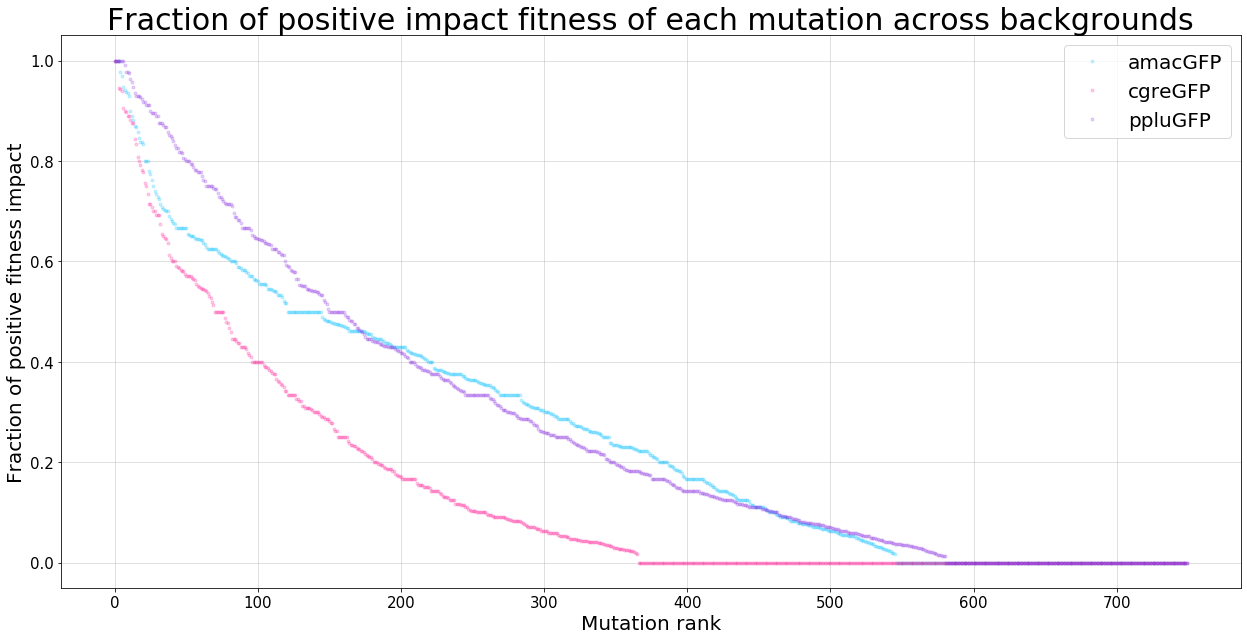

In [9]:
fig, ax = plt.subplots(figsize=(18,9))

ax.plot(amac_to_plot_final.sample(sample_size_final).sort_values(ascending=False).values, '.', alpha=0.2, c='deepskyblue')
ax.plot(cgre_to_plot_final.sample(sample_size_final).sort_values(ascending=False).values, '.', alpha=0.2, c='deeppink')
ax.plot(pplu_to_plot_final.sample(sample_size_final).sort_values(ascending=False).values, '.', alpha=0.2, c='blueviolet')

ax.set_ylabel('Fraction of positive fitness impact', fontsize=20)
ax.set_xlabel('Mutation rank', fontsize=20)
ax.set_title('Fraction of positive impact fitness of each mutation across backgrounds', fontsize=30)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.grid(alpha=0.5)
plt.legend(["amacGFP", "cgreGFP", "ppluGFP"], fontsize=20)



fig.tight_layout()
plt.savefig('all_bright_percentage_final.png', dpi=300)

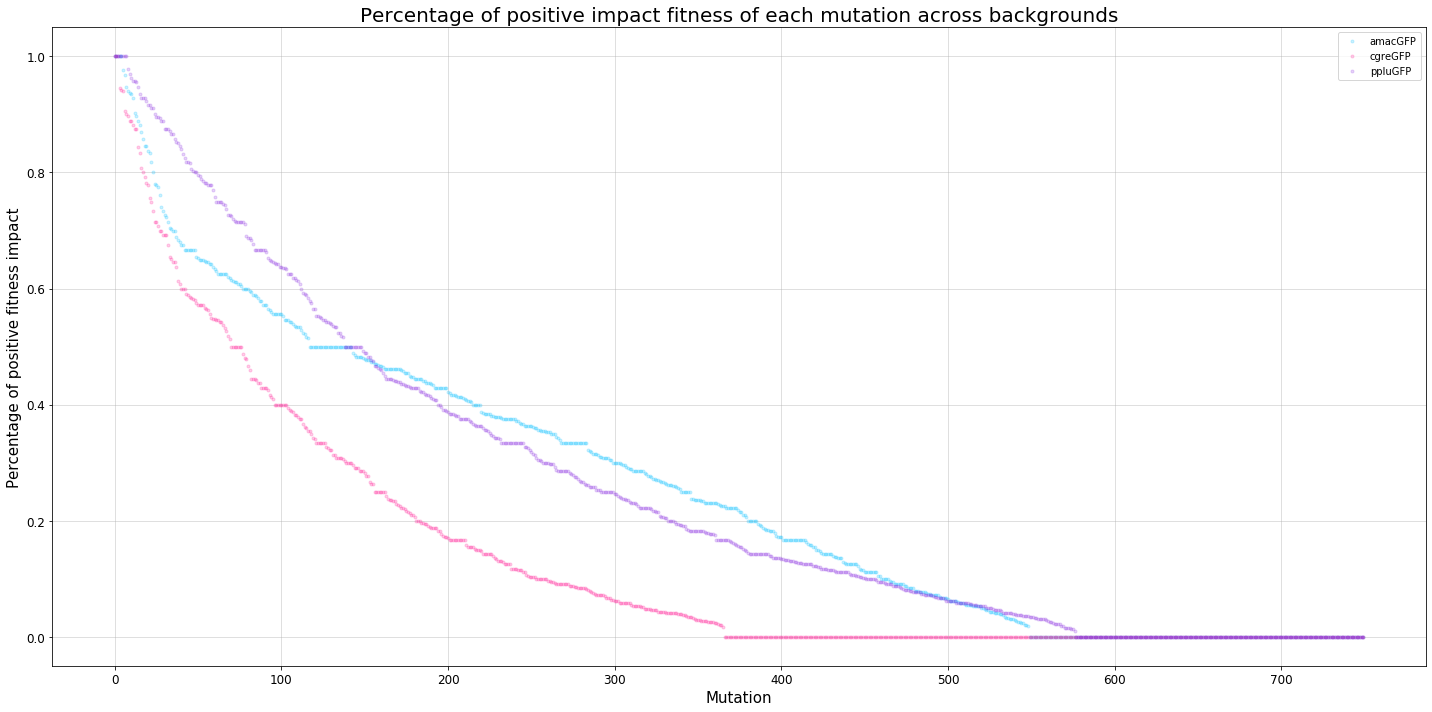

In [9]:
fig, ax = plt.subplots(figsize=(20,10))

ax.plot(amac_to_plot_thres.sample(sample_size_thres).sort_values(ascending=False).values, '.', alpha=0.2, c='deepskyblue')
ax.plot(cgre_to_plot_thres.sample(sample_size_thres).sort_values(ascending=False).values, '.', alpha=0.2, c='deeppink')
ax.plot(pplu_to_plot_thres.sample(sample_size_thres).sort_values(ascending=False).values, '.', alpha=0.2, c='blueviolet')

ax.set_ylabel('Percentage of positive fitness impact', fontsize=15)
ax.set_xlabel('Mutation', fontsize=15)
ax.set_title('Percentage of positive impact fitness of each mutation across backgrounds', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.grid(alpha=0.5)
plt.legend(["amacGFP", "cgreGFP", "ppluGFP"])



fig.tight_layout()
plt.savefig('all_bright_percentage_thres.png', dpi=300)

In [10]:
#img_amac = mpimg.imread(r'C:\Users\Elisenda\GFP_global_landscape\analysis\lis\Figures\Beneficial_mutations\amac_bright_scat.png')
#img_cgre = mpimg.imread(r'C:\Users\Elisenda\GFP_global_landscape\analysis\lis\Figures\Beneficial_mutations\cgre_bright_scat.png')
#img_pplu = mpimg.imread(r'C:\Users\Elisenda\GFP_global_landscape\analysis\lis\Figures\Beneficial_mutations\pplu_bright_scat.png')

#plt.figure(figsize=(20,10))
#plt.subplot(311)
#plt.imshow(img_amac)

#plt.subplot(312)
#plt.imshow(img_cgre)

#plt.subplot(313)
#plt.imshow(img_pplu)

#plt.show()

In [11]:
median_amac_final = pd.read_csv(r'C:\Users\Elisenda\GFP_global_landscape\analysis\lis\Figures\Beneficial_mutations\Log\amac_median_final.csv')
median_cgre_final = pd.read_csv(r'C:\Users\Elisenda\GFP_global_landscape\analysis\lis\Figures\Beneficial_mutations\Log\cgre_median_final.csv')
median_pplu_final = pd.read_csv(r'C:\Users\Elisenda\GFP_global_landscape\analysis\lis\Figures\Beneficial_mutations\Log\pplu_median_final.csv')

median_amac_thres = pd.read_csv(r'C:\Users\Elisenda\GFP_global_landscape\analysis\lis\Figures\Beneficial_mutations\Log\amac_median_thres.csv')
median_cgre_thres = pd.read_csv(r'C:\Users\Elisenda\GFP_global_landscape\analysis\lis\Figures\Beneficial_mutations\Log\cgre_median_thres.csv')
median_pplu_thres = pd.read_csv(r'C:\Users\Elisenda\GFP_global_landscape\analysis\lis\Figures\Beneficial_mutations\Log\pplu_median_thres.csv')

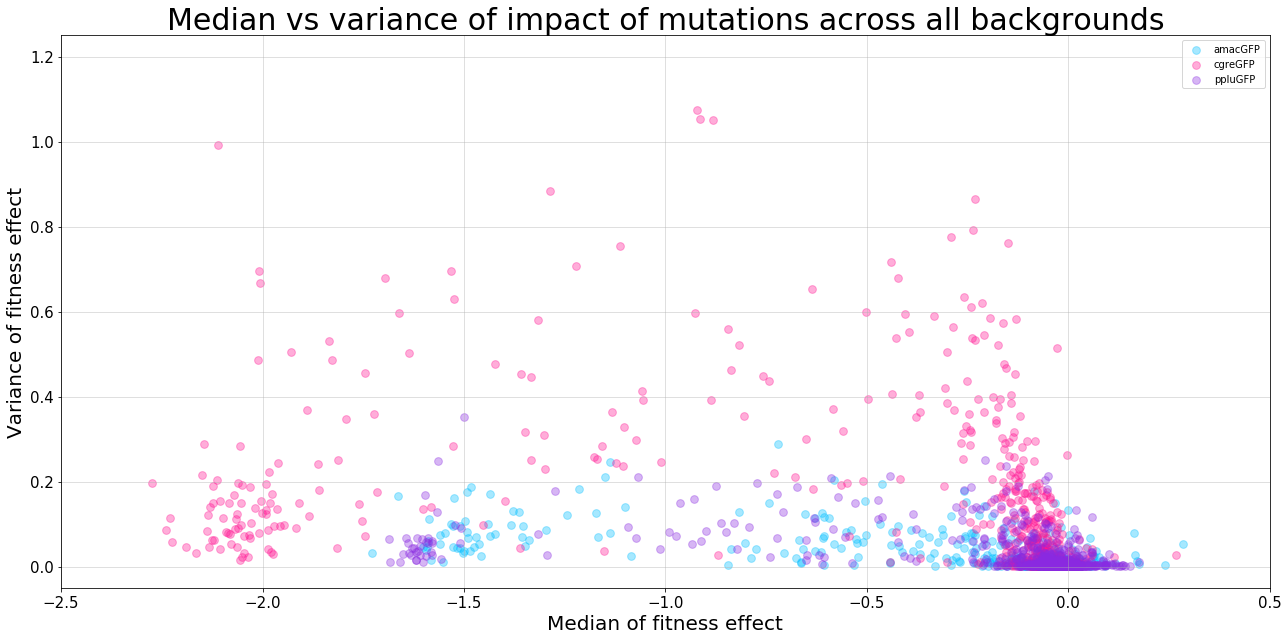

In [18]:
fig, ax = plt.subplots(figsize=(18,9))

ax.scatter('median','variance', data=median_amac_final, c='deepskyblue', s=60, alpha=0.35)
ax.scatter('median','variance', data=median_cgre_final, c='deeppink', s=60, alpha=0.35)
ax.scatter('median','variance', data=median_pplu_final, c='blueviolet', s=60, alpha=0.35)
#to_annotate[['median', 'variance', 'mutation']].apply(lambda row: ax.text(*row,fontsize=10), axis=1);

ax.set_ylabel('Variance of fitness effect', fontsize=20)
ax.set_xlabel('Median of fitness effect', fontsize=20)
ax.set_title('Median vs variance of impact of mutations across all backgrounds', fontsize=30)
#ax.set_xticks(np.arange(-0.8,0.9, step=0.1));
#ax.set_yticks(np.arange(0,12, step=2));
ax.grid(alpha=0.5)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.set_xticks(np.arange(-2.5, 1, step=0.5));
ax.set_xlim(xmin=-2.5)
ax.set_yticks(np.arange(0, 1.4, step=0.2));
ax.set_ylim(ymin=-0.05,ymax=1.25)
plt.legend(["amacGFP", "cgreGFP", "ppluGFP"])


fig.tight_layout()
plt.savefig('all_tog_median_var_pseudo_final.png', dpi=300)

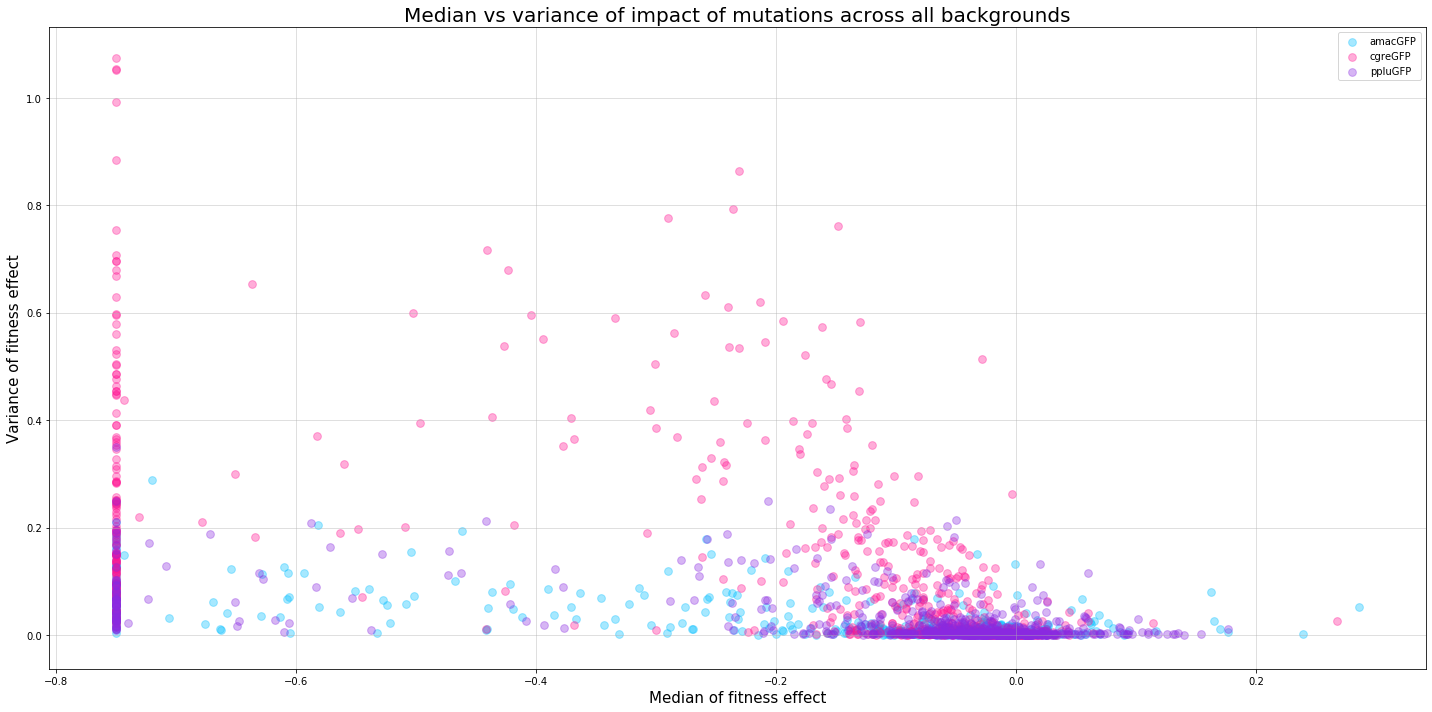

In [13]:
fig, ax = plt.subplots(figsize=(20,10))

ax.scatter('median','variance', data=median_amac_thres, c='deepskyblue', s=60, alpha=0.35)
ax.scatter('median','variance', data=median_cgre_thres, c='deeppink', s=60, alpha=0.35)
ax.scatter('median','variance', data=median_pplu_thres, c='blueviolet', s=60, alpha=0.35)
#to_annotate[['median', 'variance', 'mutation']].apply(lambda row: ax.text(*row,fontsize=10), axis=1);

ax.set_ylabel('Variance of fitness effect', fontsize=15)
ax.set_xlabel('Median of fitness effect', fontsize=15)
ax.set_title('Median vs variance of impact of mutations across all backgrounds', fontsize=20)
#ax.set_xticks(np.arange(-0.8,0.9, step=0.1));
#ax.set_yticks(np.arange(0,12, step=2));
ax.grid(alpha=0.5)
ax.tick_params(axis='both', which='major', labelsize=10)
#ax.set_xlim(xmin=-0.8,xmax=0.8)
#ax.set_ylim(ymin=-0.5)
plt.legend(["amacGFP", "cgreGFP", "ppluGFP"])


fig.tight_layout()
plt.savefig('all_tog_median_var_pseudo_thres.png', dpi=300)

In [14]:

mean_amac = pd.read_csv(r'C:\Users\Elisenda\GFP_global_landscape\analysis\lis\Figures\Beneficial_mutations\Pseudo_native\amac_mean.csv')
mean_cgre = pd.read_csv(r'C:\Users\Elisenda\GFP_global_landscape\analysis\lis\Figures\Beneficial_mutations\Pseudo_native\cgre_mean.csv')
mean_pplu = pd.read_csv(r'C:\Users\Elisenda\GFP_global_landscape\analysis\lis\Figures\Beneficial_mutations\Pseudo_native\pplu_mean.csv')

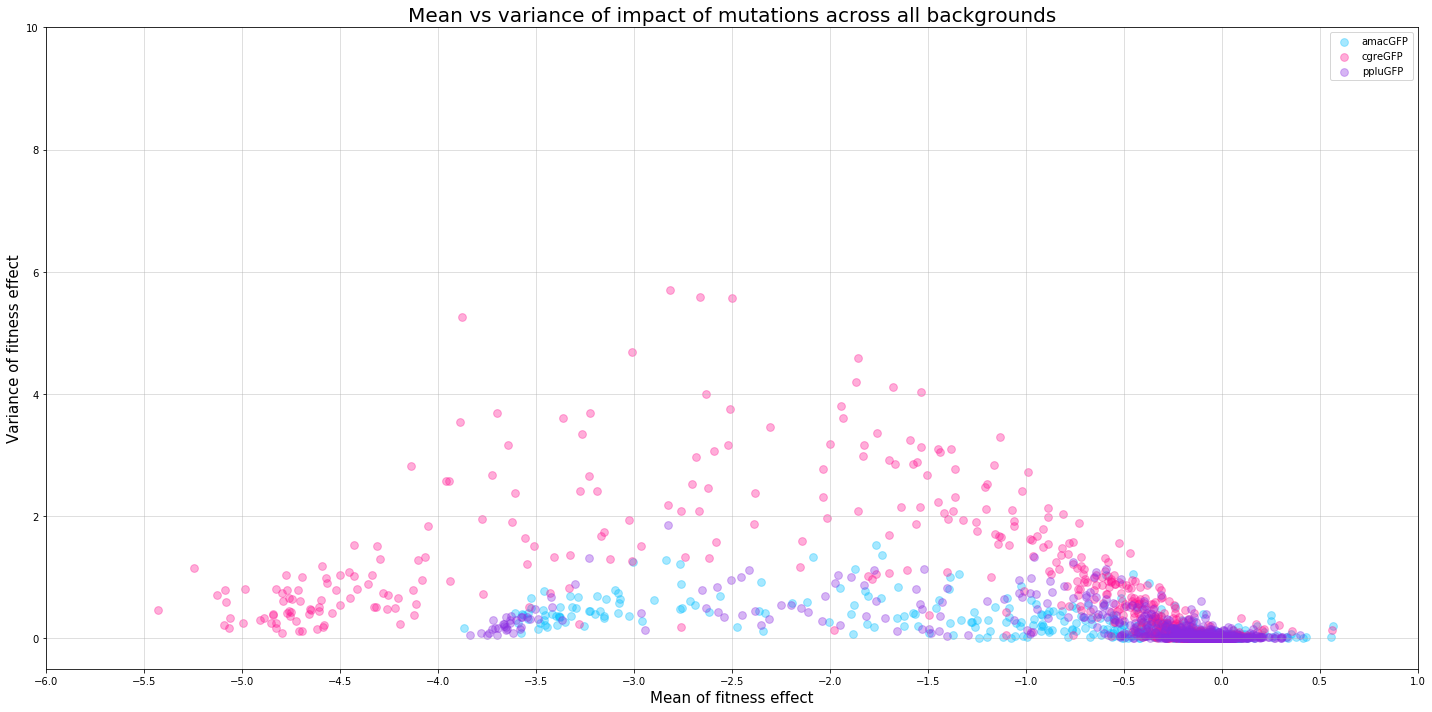

In [15]:
fig, ax = plt.subplots(figsize=(20,10))

ax.scatter('mean','variance', data=mean_amac, c='deepskyblue', s=60, alpha=0.35)
ax.scatter('mean','variance', data=mean_cgre, c='deeppink', s=60, alpha=0.35)
ax.scatter('mean','variance', data=mean_pplu, c='blueviolet', s=60, alpha=0.35)
#to_annotate[['mean', 'variance', 'mutation']].apply(lambda row: ax.text(*row,fontsize=10), axis=1);

ax.set_ylabel('Variance of fitness effect', fontsize=15)
ax.set_xlabel('Mean of fitness effect', fontsize=15)
ax.set_title('Mean vs variance of impact of mutations across all backgrounds', fontsize=20)
ax.set_xticks(np.arange(-6,1.5, step=0.5));
ax.set_yticks(np.arange(0,12, step=2));
ax.grid(alpha=0.5)
ax.tick_params(axis='both', which='major', labelsize=10)
ax.set_xlim(xmin=-6)
ax.set_ylim(ymin=-0.5)
plt.legend(["amacGFP", "cgreGFP", "ppluGFP"])

fig.tight_layout()
plt.savefig('all_tog_mean_var_pseudo.png', dpi=300)

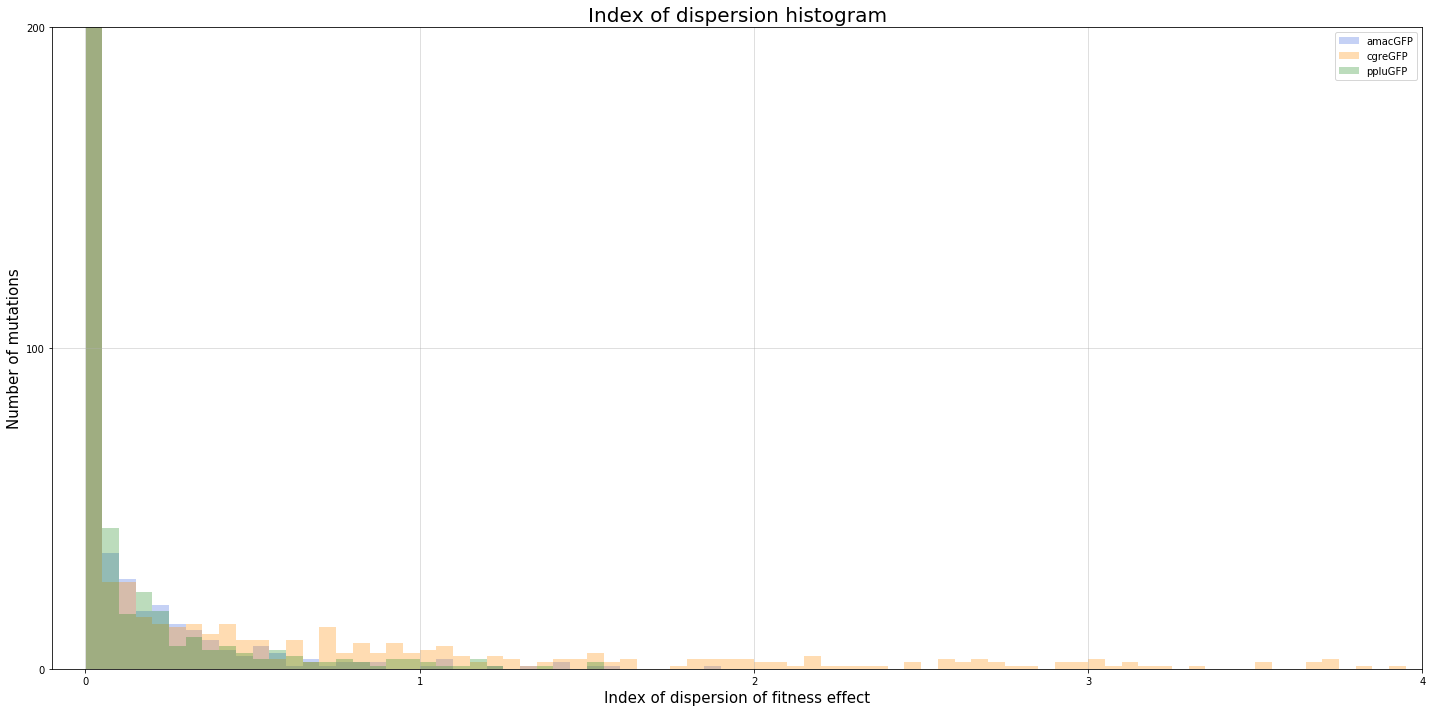

In [12]:
fig, ax = plt.subplots(figsize=(20,10))
data=median_amac['index_disp']
ax.hist(data, bins=np.arange(min(data), max(data) + 0.01, 0.05), color='deepskyblue', alpha=0.3)
data=median_cgre['index_disp']
ax.hist(data, bins=np.arange(min(data), max(data) + 0.01, 0.05), color='deeppink', alpha=0.3)
data=median_pplu['index_disp']
ax.hist(data, bins=np.arange(min(data), max(data) + 0.01, 0.05), color='blueviolet', alpha=0.3)
ax.set_xlabel('Index of dispersion of fitness effect', fontsize=15)
ax.set_ylabel('Number of mutations', fontsize=15)
ax.set_title('Index of dispersion histogram', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=10)
ax.set_xticks(np.arange(0, 16, step=1));
ax.set_yticks(np.arange(0,900, step=100));
ax.grid(alpha=0.5)
ax.set_xlim(xmin=-0.1, xmax=4)
ax.set_ylim(ymax=200)
plt.legend(["amacGFP", "cgreGFP", "ppluGFP"])

fig.tight_layout()
plt.savefig('all_tog_ind_hist_pseudo.png', dpi=300)

In [13]:
%run "\Users\Elisenda\GFP_global_landscape\analysis\louisa\lgs01a_functions_for_getting_aa_pseudopositions.ipynb"

In [14]:
def get_native_position(gene, pseudoposition):
    all_genes = ['avGFP', 'amacGFP', 'cgreGFP', 'ppluGFP']
    gene_index = dict(zip(all_genes, range(4)))
    return pseudopos_to_nativepos[pseudoposition][gene_index[gene]]

def get_native_aa(gene, pseudoposition):
    all_genes = ['avGFP', 'amacGFP', 'cgreGFP', 'ppluGFP']
    gene_index = dict(zip(all_genes, range(4)))
    return pseudopos_to_nativeaa[pseudoposition][gene_index[gene]]

def get_PDB_position(gene, pseudoposition):
    all_genes = ['avGFP', 'amacGFP', 'cgreGFP', 'ppluGFP']
    gene_structures = ['2wur.pdb', 'amacGFP_prediction.pdb', '2hpw.pdb', '2g3o.pdb']
    gene_index = dict(zip(all_genes, range(4)))
    gene_coefficients = dict(zip(all_genes, [1,1,1,1])) # shifts to add to native positions to get PDB numbering
    return pseudopos_to_nativepos[pseudoposition][gene_index[gene]] + gene_coefficients[gene]

def PDB_to_pseudo_position(gene, pdbposition):
    all_genes = ['avGFP', 'amacGFP', 'cgreGFP', 'ppluGFP']
    gene_structures = ['2wur.pdb', 'amacGFP_prediction.pdb', '2hpw.pdb', '2g3o.pdb']
    gene_index = dict(zip(all_genes, range(4)))
    gene_coefficients = dict(zip(all_genes, [1,1,1,1])) # shifts to add to native positions to get PDB numbering
    return nativepos_to_pseudopos[pdbposition][gene_index[gene]] - gene_coefficients[gene]

gene_structures = dict(zip(['avGFP', 'amacGFP', 'cgreGFP', 'ppluGFP'], 
                      ['2wur.pdb', 'amacGFP_prediction.pdb', '2hpw.pdb', '2g3o.pdb']))

In [20]:
median_amac['native_mutation']=""
median_amac['pseudo_position']=""

for index, row in median_amac.iterrows():
    mut= row['mutation']
    position=int(mut[1:-1])
    native_pos=str(get_native_position('amacGFP', position))
    start=mut[:1]
    finish=mut[-1:]
    yourstring = ''.join((start,native_pos,finish))
    median_amac['native_mutation'][index] = yourstring
    median_amac['pseudo_position'][index] = position

C:\Users\Elisenda\Miniconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Elisenda\Miniconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [21]:
median_cgre['native_mutation']=""
median_cgre['pseudo_position']=""

for index, row in median_cgre.iterrows():
    mut= row['mutation']
    position=int(mut[1:-1])
    native_pos=str(get_native_position('cgreGFP', position))
    start=mut[:1]
    finish=mut[-1:]
    yourstring = ''.join((start,native_pos,finish))
    median_cgre['native_mutation'][index] = yourstring
    median_cgre['pseudo_position'][index] = position

    
median_pplu['native_mutation']=""
median_pplu['pseudo_position']=""

for index, row in median_pplu.iterrows():
    mut= row['mutation']
    position=int(mut[1:-1])
    native_pos=str(get_native_position('ppluGFP', position))
    start=mut[:1]
    finish=mut[-1:]
    yourstring = ''.join((start,native_pos,finish))
    median_pplu['native_mutation'][index] = yourstring
    median_pplu['pseudo_position'][index] = position
median_pplu

C:\Users\Elisenda\Miniconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Elisenda\Miniconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
C:\Users\Elisenda\Miniconda3\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Use

,mutation,median,stdev,variance,index_disp,native_mutation,pseudo_position
0,*246C,0.048343,0.186794,0.034892,0.006518,*222C,246
1,*246G,0.056941,0.065951,0.004350,0.000287,*222G,246
2,*246R,0.050431,0.059646,0.003558,0.000212,*222R,246
3,*246W,-0.184063,0.113468,0.012875,0.001461,*222W,246
4,A119E,0.030068,0.084941,0.007215,0.000613,A106E,119
...,...,...,...,...,...,...,...
851,Y80S,-0.122277,0.074413,0.005537,0.000412,Y69S,80
852,Y95C,-0.346360,0.543773,0.295689,0.160788,Y82C,95
853,Y95F,-0.074573,0.270831,0.073349,0.019865,Y82F,95
854,Y95H,-0.050514,0.380355,0.144670,0.055026,Y82H,95


In [22]:
amac_text=median_amac.loc[median_amac['median']>0.1]
cgre_text=median_cgre.loc[median_cgre['median']>0.1]
pplu_text=median_pplu.loc[median_pplu['median']>0.1]

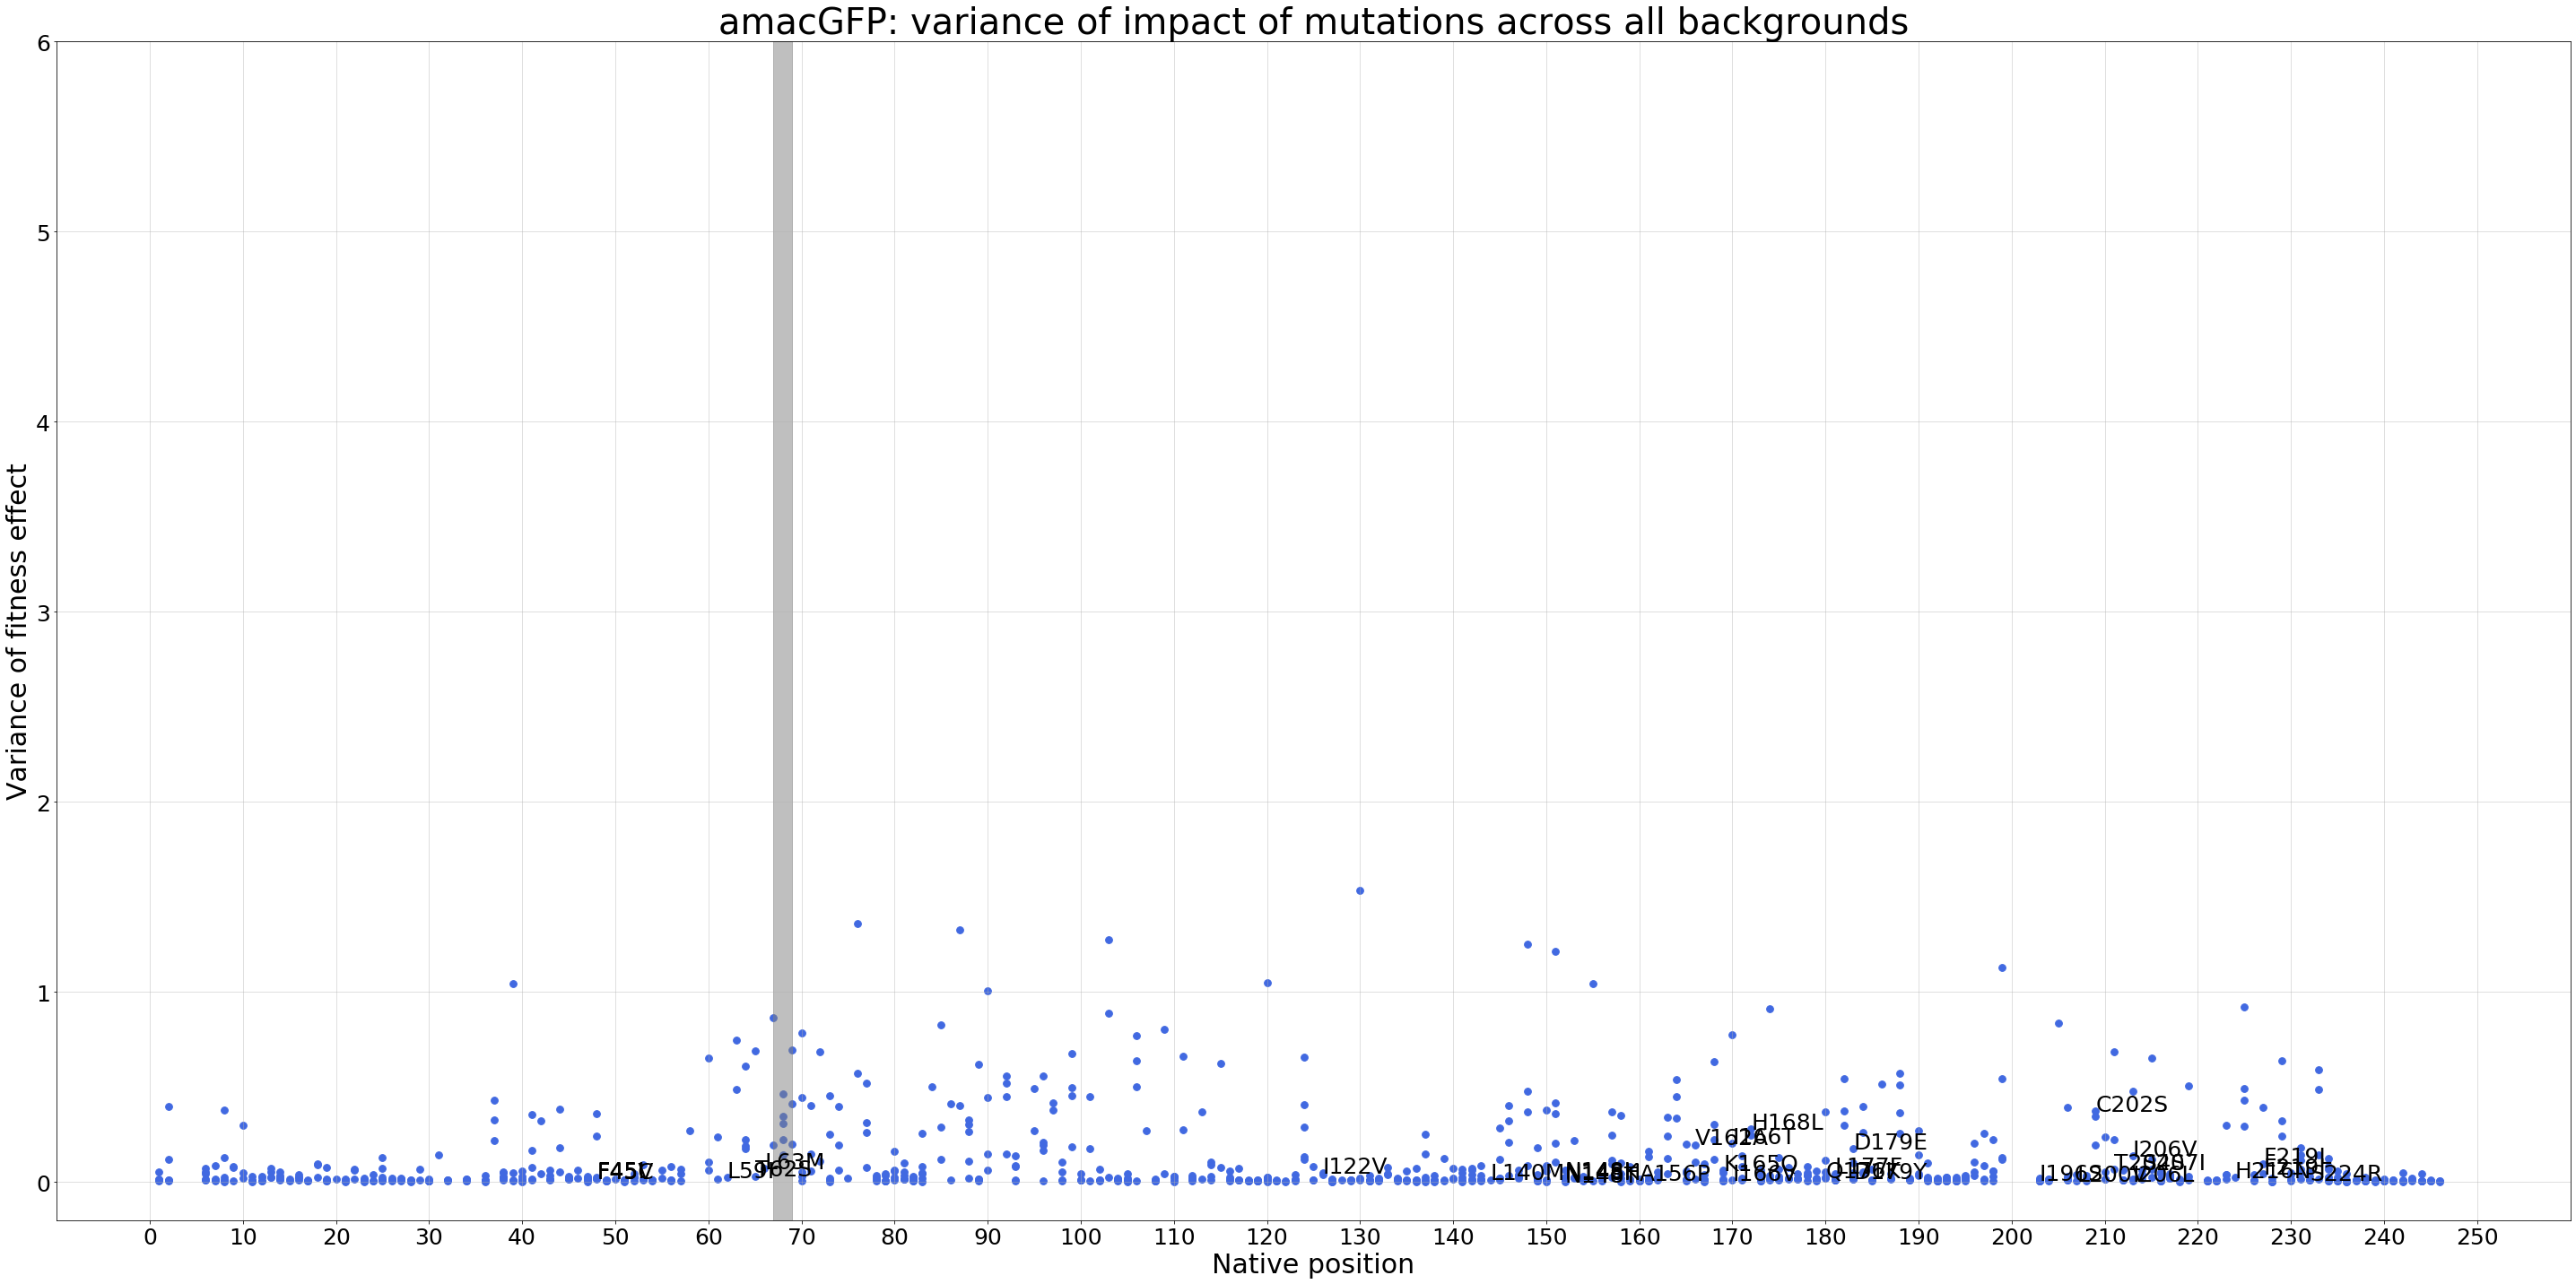

In [23]:
fig, ax = plt.subplots(figsize=(40,20))

ax.scatter('pseudo_position', 'variance', data=median_amac, c='deepskyblue', s=60)
amac_text[['pseudo_position', 'variance', 'native_mutation']].apply(lambda row: ax.text(*row,fontsize=25), axis=1)

ax.set_ylabel('Variance of fitness effect', fontsize=30)
ax.set_xlabel('Native position', fontsize=30)
ax.set_title('amacGFP: variance of impact of mutations across all backgrounds', fontsize=40)
ax.set_xticks(np.arange(0, 260, step=10));
ax.set_yticks(np.arange(0, 7, step=1));
ax.grid(alpha=0.5)
ax.tick_params(axis='both', which='major', labelsize=25)
ax.set_xlim(xmin=-10,xmax=260)
ax.set_ylim(ymin=-0.2,ymax=6)
plt.axvspan(67, 69, color='gray', alpha=0.1)

fig.tight_layout()
plt.savefig('amac_bright_variance_pseudo.png', dpi=300)

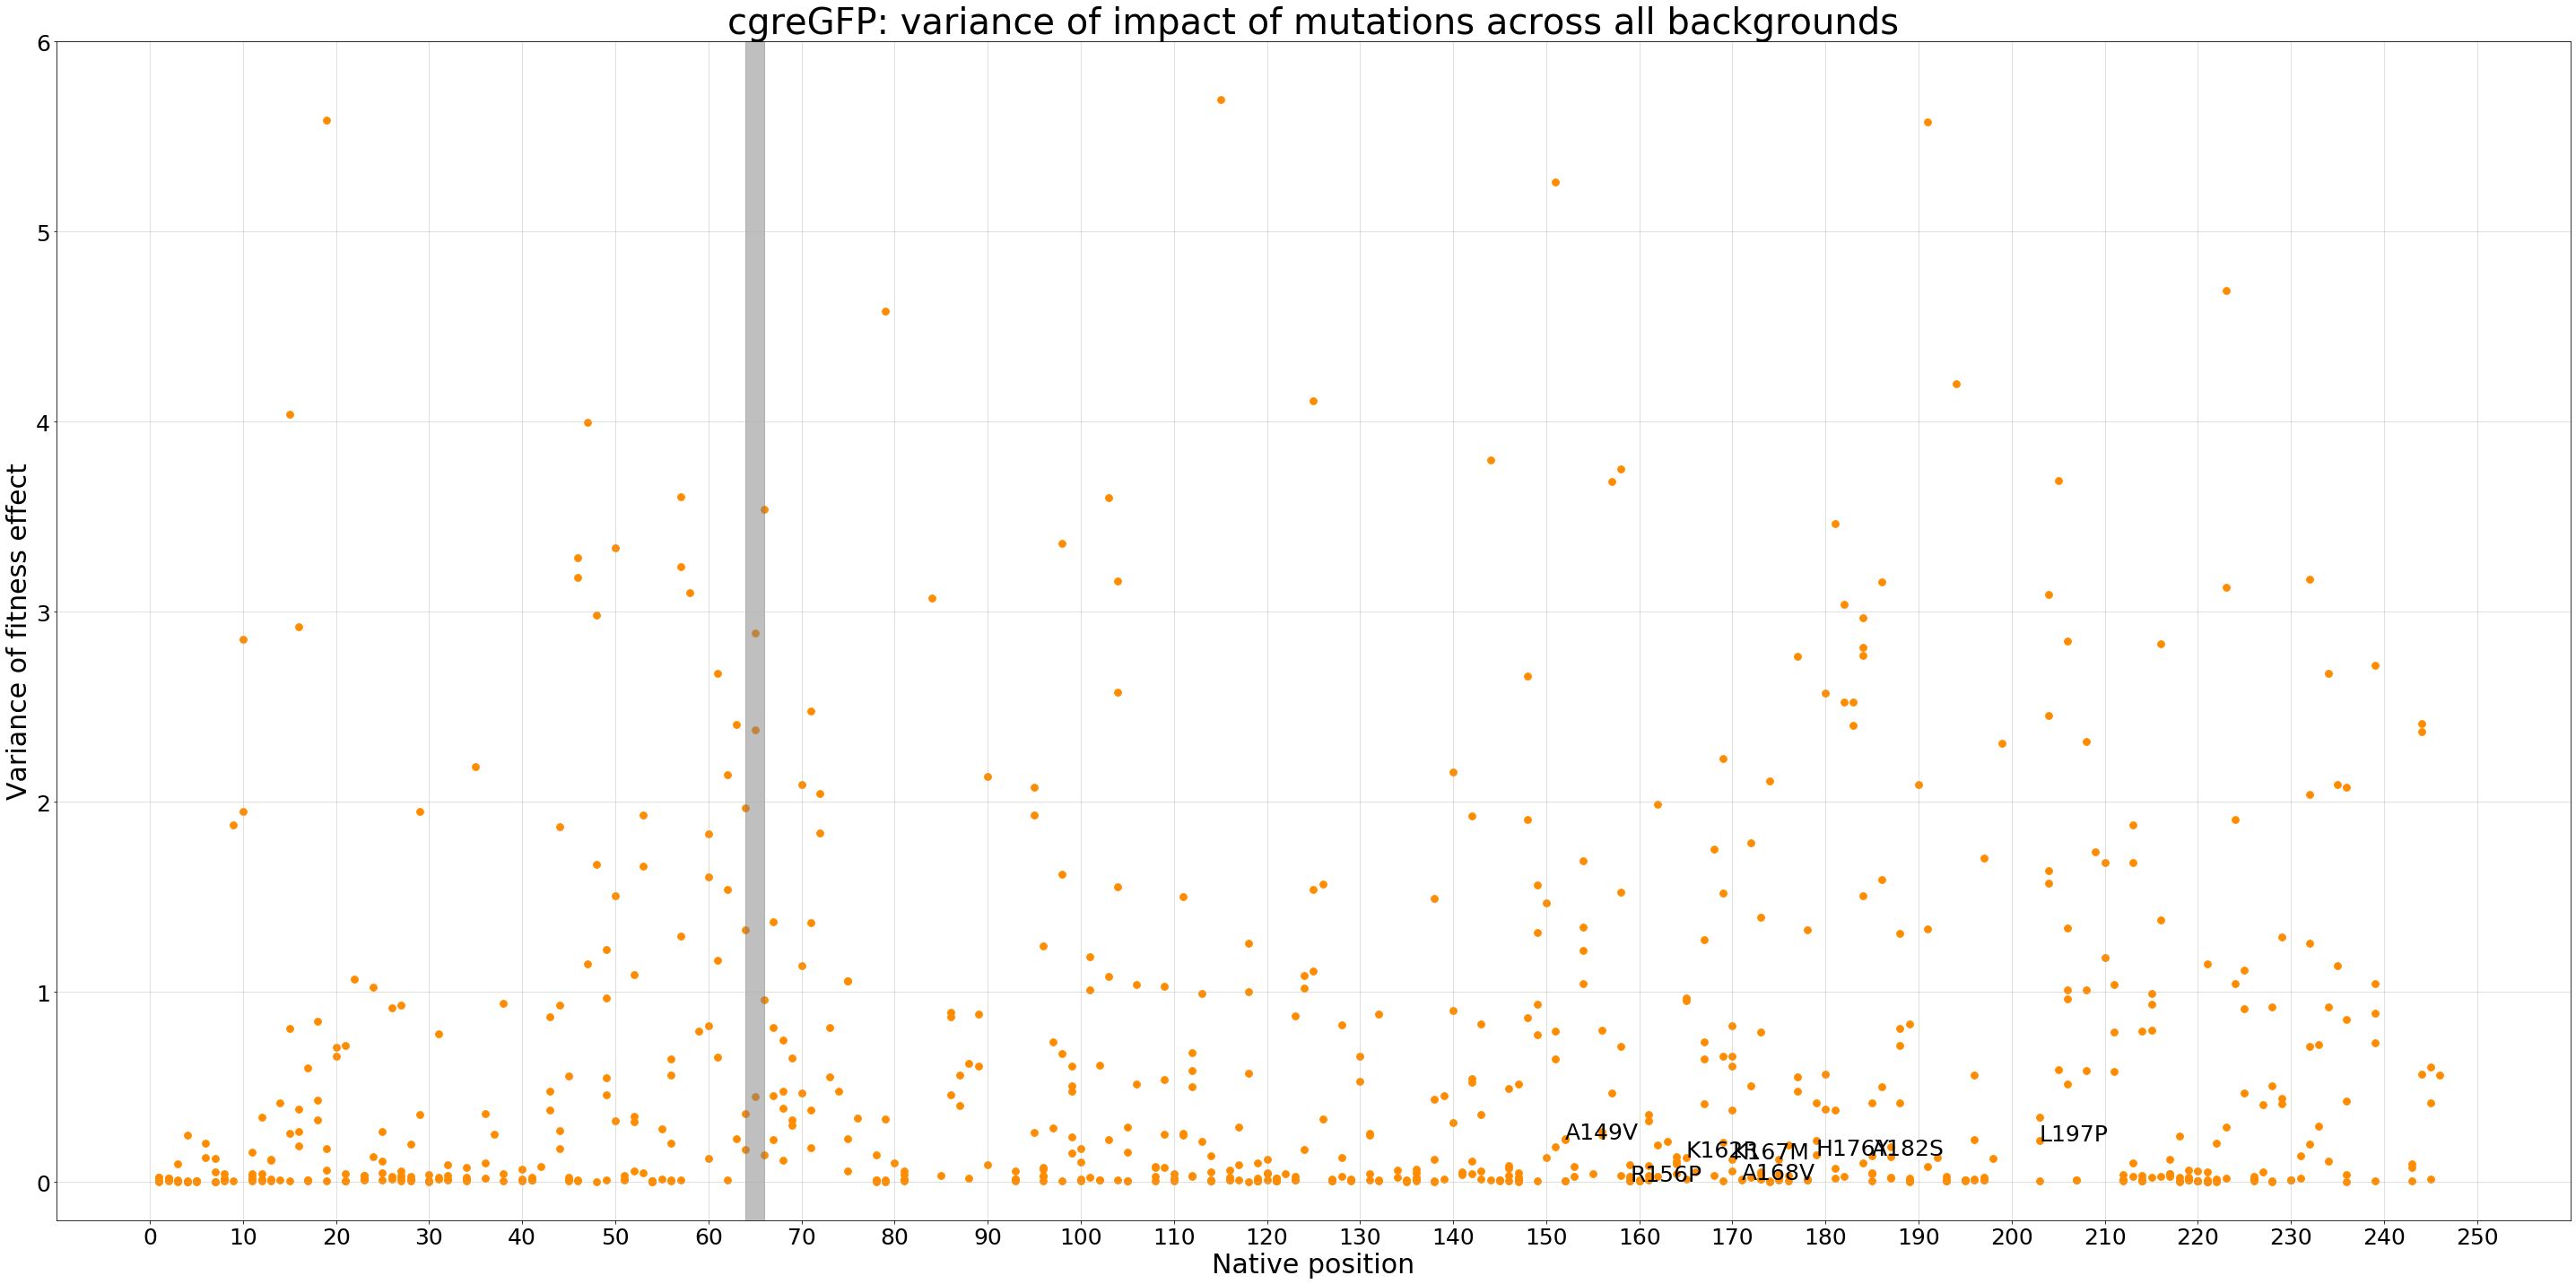

In [24]:
fig, ax = plt.subplots(figsize=(40,20))

ax.scatter('pseudo_position', 'variance', data=median_cgre, c='deeppink', s=60)
cgre_text[['pseudo_position', 'variance', 'native_mutation']].apply(lambda row: ax.text(*row,fontsize=25), axis=1)

ax.set_ylabel('Variance of fitness effect', fontsize=30)
ax.set_xlabel('Native position', fontsize=30)
ax.set_title('cgreGFP: variance of impact of mutations across all backgrounds', fontsize=40)
ax.set_xticks(np.arange(0, 260, step=10));
ax.set_yticks(np.arange(0, 7, step=1));
ax.grid(alpha=0.5)
ax.tick_params(axis='both', which='major', labelsize=25)
ax.set_xlim(xmin=-10,xmax=260)
ax.set_ylim(ymin=-0.2,ymax=6)
plt.axvspan(64, 66, color='gray', alpha=0.1)

fig.tight_layout()
plt.savefig('cgre_bright_variance_pseudo.png', dpi=300)

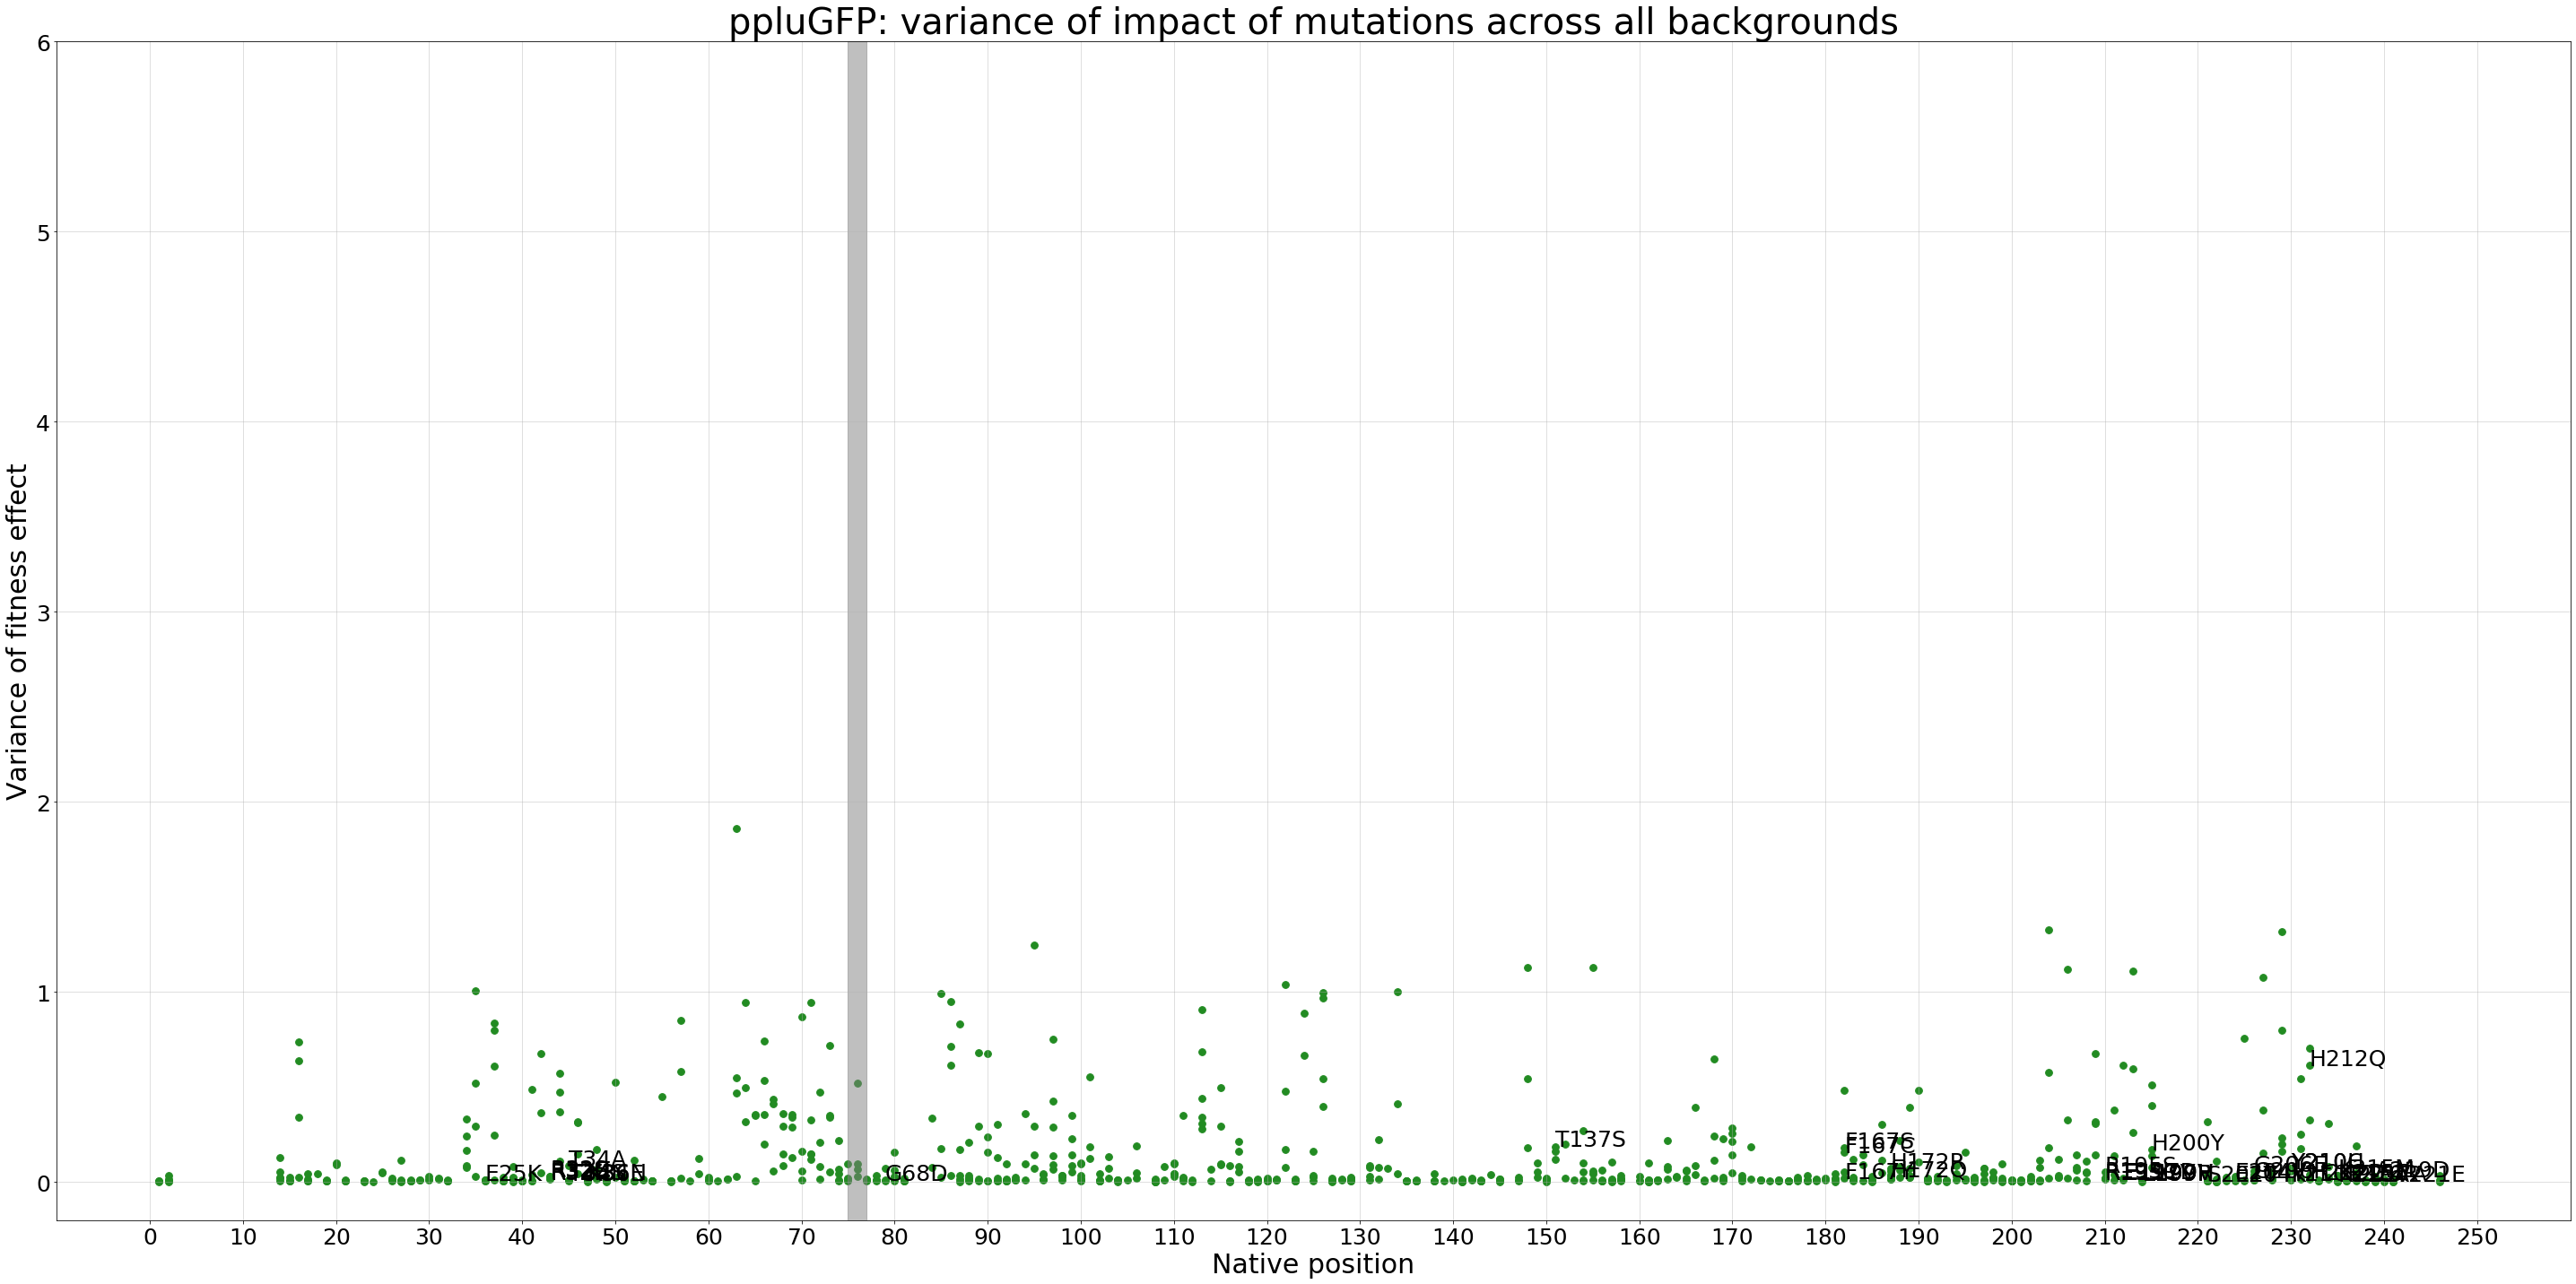

In [26]:
fig, ax = plt.subplots(figsize=(40,20))

ax.scatter('pseudo_position', 'variance', data=median_pplu, c='blueviolet', s=60)
pplu_text[['pseudo_position', 'variance', 'native_mutation']].apply(lambda row: ax.text(*row,fontsize=25), axis=1)

ax.set_ylabel('Variance of fitness effect', fontsize=30)
ax.set_xlabel('Native position', fontsize=30)
ax.set_title('ppluGFP: variance of impact of mutations across all backgrounds', fontsize=40)
ax.set_xticks(np.arange(0, 260, step=10));
ax.set_yticks(np.arange(0, 7, step=1));
ax.grid(alpha=0.5)
ax.tick_params(axis='both', which='major', labelsize=25)
ax.set_xlim(xmin=-10,xmax=260)
ax.set_ylim(ymin=-0.2,ymax=6)
plt.axvspan(75, 77, color='gray', alpha=0.1)

fig.tight_layout()
plt.savefig('pplu_bright_variance_pseudo.png', dpi=300)